In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

[&larr; Back to Index](index.html)

# Onset Detection

Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval. Here, we will show how to detect an **onset**, the very instant that marks the beginning of the transient part of a sound, or the earliest moment at which a transient can be reliably detected.

For more reading:
- [Tutorial on Onset Detection by Juan Bello](https://files.nyu.edu/jb2843/public/Publications_files/2005_BelloEtAl_IEEE_TSALP.pdf)
- [Boeck, Sebastian, Florian Krebs, and Markus Schedl. “Evaluating the Online Capabilities of Onset Detection Methods.” ISMIR 2012](http://www.cp.jku.at/research/papers/Boeck_etal_ISMIR_2012.pdf)

Load an audio file into the NumPy array `x` and sampling rate `sr`. 

In [3]:
x, sr = librosa.load('audio/classic_rock_beat.wav')

In [4]:
ipd.Audio(x, rate=sr)

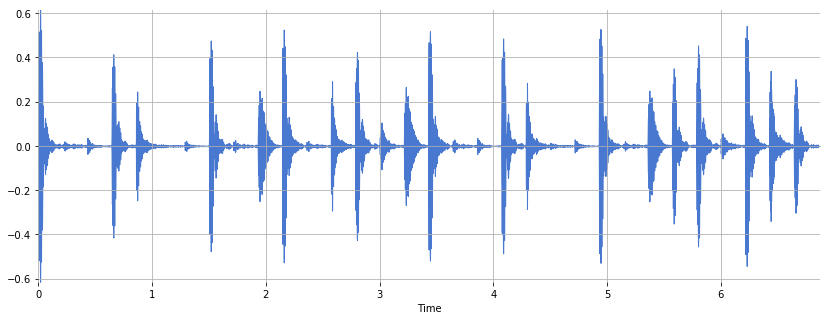

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

## `librosa.onset.onset_detect`

[`librosa.onset.onset_detect`](http://librosa.github.io/librosa/generated/librosa.onset.onset_detect.html#librosa.onset.onset_detect) works in the following way:

1.  Compute a spectral novelty function.
2.  Find peaks in the spectral novelty function.
3.  [optional] Backtrack from each peak to a preceding local minimum. Backtracking can be useful for finding segmentation points such that the onset occurs shortly after the beginning of the segment.

Compute the frame indices for estimated onsets in a signal:

In [6]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets

[ 20  29  38  57  65  75  84  93 103 112 121 131 140 148 158 167 176 185
 213 232 241 250 260 268 278 288]


Convert onsets to units of seconds:

In [7]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

[0.46439909 0.67337868 0.88235828 1.32353741 1.50929705 1.7414966
 1.95047619 2.15945578 2.39165533 2.60063492 2.80961451 3.04181406
 3.25079365 3.43655329 3.66875283 3.87773243 4.08671202 4.29569161
 4.94585034 5.38702948 5.59600907 5.80498866 6.03718821 6.22294785
 6.45514739 6.68734694]


Plot the onsets on top of a spectrogram of the audio:

In [8]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

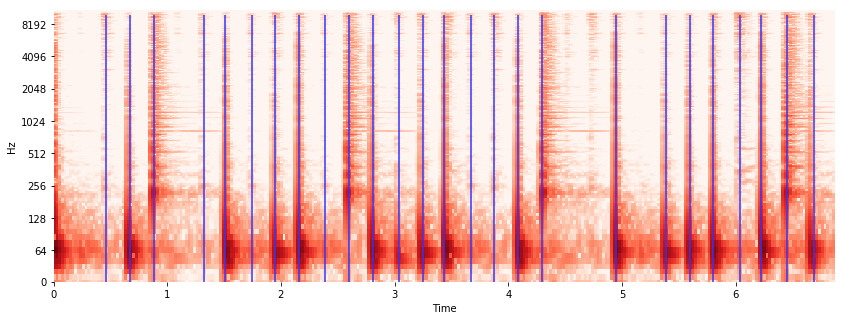

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log', cmap='Reds')
plt.vlines(onset_times, 0, 10000, color='#3333FF')

Let's also plot the onsets with the time-domain waveform.

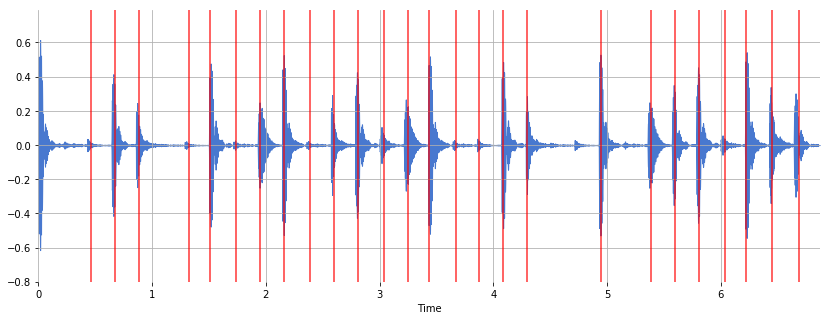

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

## librosa.clicks

We can add a click at the location of each detected onset.

In [11]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))

Listen to the original audio plus the detected onsets. One way is to add the signals together, sample-wise:

In [12]:
ipd.Audio(x + clicks, rate=sr)

Another method is to play the original track in one stereo channel and the click track in the other stereo channel:

In [13]:
ipd.Audio(numpy.vstack([x, clicks]), rate=sr)

You can also change the click to a custom audio file instead:

In [14]:
cowbell, _ = librosa.load('audio/cowbell.wav')

In [15]:
ipd.Audio(cowbell, rate=sr)

More cowbell?

In [16]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x), click=cowbell)

In [17]:
ipd.Audio(x + clicks, rate=sr)

In [18]:
ipd.Image(url='http://www.reactiongifs.com/r/2013/11/More-cowbell.gif')

## Questions

In `librosa.onset.onset_detect`, use the `backtrack=True` parameter. What does that do, and how does it affect the detected onsets? (See [`librosa.onset.onset_backtrack`](http://librosa.github.io/librosa/generated/librosa.onset.onset_backtrack.html#).)

In `librosa.onset.onset_detect`, you can use the keyword parameters found in [`librosa.util.peak_pick`](http://librosa.github.io/librosa/generated/librosa.util.peak_pick.html#librosa.util.peak_pick), e.g. `pre_max`, `post_max`, `pre_avg`, `post_avg`, `delta`, and `wait`, to control the peak picking algorithm. Adjust these parameters. How does it affect the detected onsets?

[&larr; Back to Index](index.html)